In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [7]:
train_df = pd.read_csv(r"C:\Users\blais\Documents\ML\data\kaggle\train.csv")

In [8]:
test_df = pd.read_csv(r"C:\Users\blais\Documents\ML\data\kaggle\test.csv")

In [9]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Problem - Predict the Sale Price from the different attributes/features.

In [11]:
train_df.shape

(1460, 81)

In [12]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# Remove rows with missing target, separate target from predictors
train_df.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_df.SalePrice              
train_df.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(train_df, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = test_df[my_cols].copy()

In [14]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [15]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 227), (1168,), (292, 227), (292,))

In [16]:
reg = xgb.XGBRegressor(
    base_score = 0.5,
    n_estimators = 5000,
    booster = 'gbtree', # using tree based models for learning
    verbosity = 2, # 2 is info
    eta = 0.05, gamma = 5, max_depth = 14, reg_lambda = 8.0, 
    objective = 'reg:absoluteerror', 
    colsample_bytree = 0.4,
    colsample_bylevel = 0.6,
    early_stopping_rounds = 100,
    subsample = 0.4,
    reg_alpha = 0.4,
    min_child_weight=0.5
)

In [17]:
reg.fit(X_train, y_train, 
        eval_set = [(X_train, y_train), (X_valid, y_valid)],
        verbose=True)

[18:34:53] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1168, 227, 264860).
[18:34:53] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (292, 227, 59204).
[0]	validation_0-mae:172808.42754	validation_1-mae:173369.91182
[1]	validation_0-mae:165158.44745	validation_1-mae:165719.93193
[2]	validation_0-mae:157790.96498	validation_1-mae:158352.44943
[3]	validation_0-mae:150441.86756	validation_1-mae:151003.35210
[4]	validation_0-mae:143866.52789	validation_1-mae:144421.70013
[5]	validation_0-mae:137631.82789	validation_1-mae:138144.13399
[6]	validation_0-mae:131855.52225	validation_1-mae:132317.94665
[7]	validation_0-mae:126363.68868	validation_1-mae:126770.57106
[8]	validation_0-mae:120937.83720	validation_1-mae:121250.56576
[9]	validation_0-mae:115991.36542	validation_1-mae:116169.05624
[10]	validation_0-mae:111161.53532	validation_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=100, enable_categorical=False,
             eta=0.05, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, ...)

In [18]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [19]:
  
y_pred = reg.predict(X_valid)

mean_absolute_error(y_valid,y_pred)

17858.935546875

In [20]:
root_mean_squared_error(y_valid,y_pred)

36027.171875

Hyperparameter tuning with Hyperopt:

In [21]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [22]:
def hyperparameter_tuning(space):
    int_vals = ['max_depth','reg_alpha']
    space = {k: (int(val) if k in int_vals else val) for k,val in space.items()}
    model = xgb.XGBRegressor(**space)
    evaluation = [(X_train, y_train), (X_valid, y_valid)]
    model.fit(X_train,y_train, eval_set = evaluation, verbose=False)
    pred = model.predict(X_valid)
    score = mean_absolute_error(y_valid,y_pred)
    return {'loss': score, 'status': STATUS_OK, 'model': model}

In [23]:
space = {'max_depth': hp.quniform('max_depth', 1, 8, 1), # tree
            'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
            'subsample': hp.uniform('subsample', 0.5, 1), # stochastic
            'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
            'reg_alpha': hp.uniform('reg_alpha', 0, 10),
            'reg_lambda': hp.uniform('reg_lambda', 1, 10),
            'gamma': hp.loguniform('gamma', -10, 10), # regularization
            'learning_rate': hp.loguniform('learning_rate', -7, 0), # boosting
            'random_state': 42
            }

In [25]:
trials = Trials()

best = fmin(fn = hyperparameter_tuning, space = space, algo = tpe.suggest, max_evals = 10, trials = trials)

100%|██████████| 10/10 [00:03<00:00,  2.92trial/s, best loss: 17858.935546875]


In [26]:
best

{'colsample_bytree': 0.648621980334471,
 'gamma': 7.91870764668883e-05,
 'learning_rate': 0.10101332158672442,
 'max_depth': 5.0,
 'min_child_weight': 0.5337560522547311,
 'reg_alpha': 1.3973534436496693,
 'reg_lambda': 7.918842847633318,
 'subsample': 0.7659196738199974}

Now, train the model with these hyperparameters:

In [27]:
int_vals = ['max_depth','reg_alpha']
processed_params = {k: (int(val) if k in int_vals else val) for k, val in best.items()}

In [28]:
xg_ex = xgb.XGBRegressor(**processed_params, early_stopping_rounds=50, n_estimators = 5000, objective = 'reg:absoluteerror')

In [29]:
xg_ex.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_valid,y_valid)], verbose=True)

[0]	validation_0-mae:51583.59853	validation_1-mae:51684.13458
[1]	validation_0-mae:48167.55260	validation_1-mae:48569.02836
[2]	validation_0-mae:44913.44555	validation_1-mae:45442.39046
[3]	validation_0-mae:42171.18952	validation_1-mae:42797.58348
[4]	validation_0-mae:39870.22098	validation_1-mae:40706.79880
[5]	validation_0-mae:37403.82846	validation_1-mae:38642.23282
[6]	validation_0-mae:35358.55845	validation_1-mae:36927.36200
[7]	validation_0-mae:33193.83095	validation_1-mae:35113.39266
[8]	validation_0-mae:31456.31120	validation_1-mae:33615.78649
[9]	validation_0-mae:29749.40334	validation_1-mae:32120.47597
[10]	validation_0-mae:28224.86384	validation_1-mae:31111.83687
[11]	validation_0-mae:27162.45414	validation_1-mae:30267.76346
[12]	validation_0-mae:25788.98616	validation_1-mae:29927.72223
[13]	validation_0-mae:24664.26219	validation_1-mae:28976.00195
[14]	validation_0-mae:23648.29300	validation_1-mae:28119.34075
[15]	validation_0-mae:22676.25466	validation_1-mae:27452.95815
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.648621980334471, device=None,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=7.91870764668883e-05, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.10101332158672442,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.5337560522547311, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
  
y_pred = xg_ex.predict(X_valid)

mean_absolute_error(y_valid,y_pred)

17567.013671875

**Defining Parameter Distributions:**
- Rather than limiting the hyperparameters to selection from a list of options, the hyeropt lib has various functions that let us define how to choose valies.
- The choice function can specify a discrete set of values for a categorical hyperparameter. The choice function takes 2 arguments -  a list of possible values and an optional probability distribution over these values. It then returns a random value from the list according to the specified probability distribution.

In [31]:
from hyperopt import hp, pyll

In [32]:
pyll.stochastic.sample(hp.choice('value',['a','b','c']))

'b'

To generate a random value from a list of possible values ['a','b','c'] with probabilities [0.05, 0.9, 0.05] use the choice function:

In [33]:
pyll.stochastic.sample(hp.pchoice('value', [(0.05, 'a'),(0.9, 'b'), (0.05, 'c')]))

'b'

Uniform:
- The uniform function specifies a uniform distribution over a continuous range of values. This function takes 2 arguments, the minimum and maximum values of the uniform distribution, and returns a random floating-point value within this range.

In [34]:
# example - generate a random floating-point value between 0 and 1 using
# the uniform function
from hyperopt import hp, pyll

In [35]:
pyll.stochastic.sample(hp.uniform('value',0,1))

0.51934223779077

let's call this fn 10,000 times and then inspect the histogram of the result. This is so as to illustrate that there is an equal probability of choosing any value.

In [36]:
uniform_vals = [pyll.stochastic.sample(hp.uniform('value',0,1)) for _ in range(10000)]

In [37]:
import matplotlib.pyplot as plt

(array([ 982., 1043., 1041.,  993., 1031.,  982.,  927., 1019.,  991.,
         991.]),
 array([1.49261583e-04, 1.00123750e-01, 2.00098239e-01, 3.00072728e-01,
        4.00047217e-01, 5.00021705e-01, 5.99996194e-01, 6.99970683e-01,
        7.99945171e-01, 8.99919660e-01, 9.99894149e-01]),
 <BarContainer object of 10 artists>)

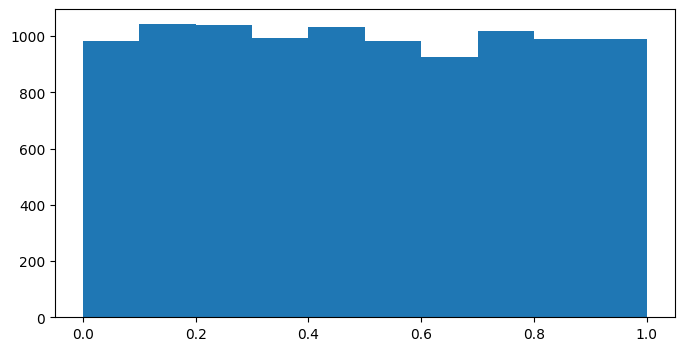

In [38]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(uniform_vals)

The loguniform function can specify a log-uniform distribution over a continuous range of values. This fn takes 2 arguments: the minimum and maximum values of the log uniform distro and returns a floating point value within this range on a log scale.

- here's the histogram of the loguniform values from -5 to 5. note that these values don't range from -5 to 5 but rather (math.exp(-5) to math.exp(5)). These values will strongly favour the low end.

In [39]:
pyll.stochastic.sample(hp.loguniform('value', -5, 5))

1.481453983196575

In [40]:
loguniform_vals = [pyll.stochastic.sample(hp.loguniform('value', -5, 5))
                    for _ in range(10000)]

(array([7650.,  744.,  418.,  305.,  213.,  192.,  152.,  139.,   92.,
          95.]),
 array([6.74087220e-03, 1.48393388e+01, 2.96719367e+01, 4.45045346e+01,
        5.93371325e+01, 7.41697304e+01, 8.90023283e+01, 1.03834926e+02,
        1.18667524e+02, 1.33500122e+02, 1.48332720e+02]),
 <BarContainer object of 10 artists>)

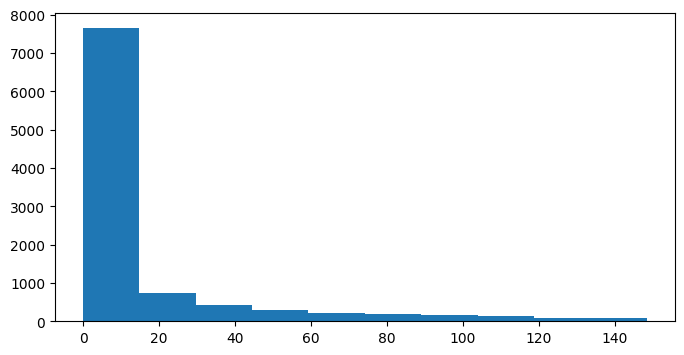

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(loguniform_vals)

In [42]:
import math

In [43]:
math.exp(-5), math.exp(5)

(0.006737946999085467, 148.4131591025766)

Another example:
- to generate a random floating-point value between 0.1 and 10 - using the loguniform distribution, use the following code:

In [44]:
loguniform_vals = [pyll.stochastic.sample(hp.loguniform('value', math.log(0.1), math.log(10)))
                    for _ in range(10000)]

(array([5220., 1399.,  806.,  635.,  491.,  391.,  341.,  281.,  218.,
         218.]),
 array([0.1001195 , 1.08965898, 2.07919847, 3.06873796, 4.05827744,
        5.04781693, 6.03735641, 7.0268959 , 8.01643539, 9.00597487,
        9.99551436]),
 <BarContainer object of 10 artists>)

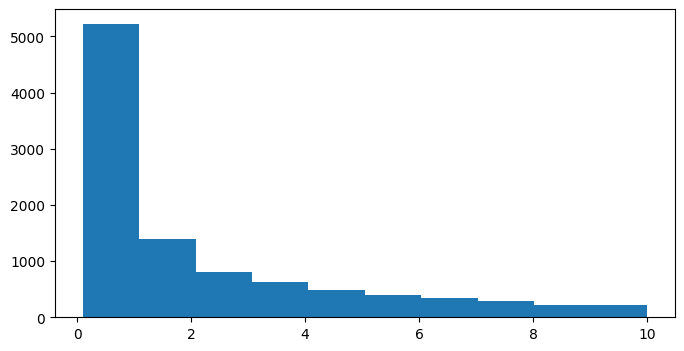

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(loguniform_vals)

The quniform function can be used to specify an integer from the range [exp(low), exp(high)]. the fxn also accepts a q parameter that specifies the step (for q=1, it returns every integer in the range, q=3, every third integer)

In [46]:
quniform_vals = [pyll.stochastic.sample(hp.quniform('value', -5, 5, q=2))
for _ in range(10_000)]


(array([2036.,    0., 1977.,    0.,    0., 2000.,    0., 1962.,    0.,
        2025.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <BarContainer object of 10 artists>)

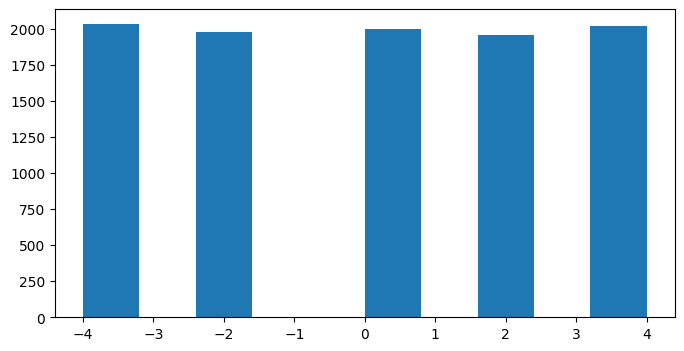

In [47]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(quniform_vals)

In [48]:
pyll.stochastic.sample(hp.quniform('value', -5, 5, q=1))

4.0

In [49]:
import pandas as pd

In [50]:
pd.Series(quniform_vals).value_counts()

-4.0    2036
 4.0    2025
 0.0    2000
-2.0    1977
 2.0    1962
Name: count, dtype: int64

Exploring the trials: